<a href="https://colab.research.google.com/github/sebastianacevedo1/juanAcevedoEstructuraDatoss/blob/main/taller1grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de adyacencia:
 
[[  0   0 330   0 190 180   0 180   0 345   0]
 [  0   0 415   0 170   0   0   0   0 310   0]
 [330 415   0 300 317 230   0   0   0   0   0]
 [  0   0 300   0   0 275 225   0   0   0 450]
 [190 170 317   0   0   0   0   0   0 299   0]
 [180   0 230 275   0   0 198 314   0   0   0]
 [  0   0   0 225   0 198   0 267   0   0 280]
 [180   0   0   0   0 314 267   0 230 450 255]
 [  0   0   0   0   0   0   0 230   0 250 312]
 [345 310   0   0 299   0   0 450 250   0   0]
 [  0   0   0 450   0   0 280 255 312   0   0]]
 
Matriz de incidencia:
 
[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 

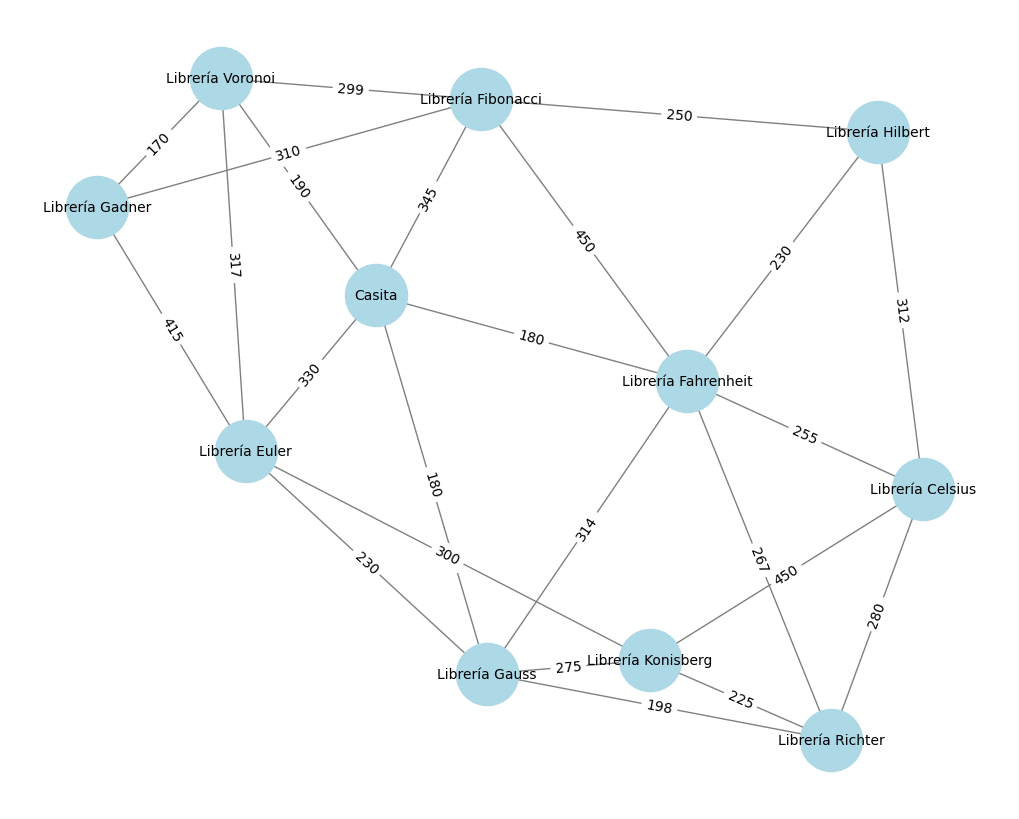

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice # This line was missing

# Define las ciudades (vértices) y las distancias (aristas)
ciudades = [
   "Casita", "Librería Gadner", "Librería Euler", "Librería Konisberg",
   "Librería Voronoi", "Librería Gauss", "Librería Richter", "Librería Fahrenheit",
   "Librería Hilbert", "Librería Fibonacci", "Librería Celsius"
]

conexiones = {
    ("Casita", "Librería Gauss"): 180,
    ("Casita", "Librería Fibonacci"): 345,
    ("Casita", "Librería Fahrenheit"): 180,
    ("Casita", "Librería Voronoi"): 190,
    ("Casita", "Librería Euler"): 330,
    ("Librería Konisberg", "Librería Celsius"): 450,
    ("Librería Fibonacci", "Librería Voronoi"): 299,
    ("Librería Fibonacci", "Librería Fahrenheit"): 450,
    ("Librería Fibonacci", "Librería Hilbert"): 250,
    ("Librería Euler", "Librería Gadner"): 415,
    ("Librería Euler", "Librería Konisberg"): 300,
    ("Librería Euler", "Librería Voronoi"): 317,
    ("Librería Euler", "Librería Gauss"): 230,
    ("Librería Hilbert", "Librería Celsius"): 312,
    ("Librería Hilbert", "Librería Fahrenheit"): 230,
    ("Librería Fahrenheit", "Librería Celsius"): 255,
    ("Librería Fahrenheit", "Librería Gauss"): 314,
    ("Librería Gauss", "Librería Konisberg"): 275,
    ("Librería Gauss", "Librería Richter"): 198,
    ("Librería Fahrenheit", "Librería Richter"): 267,
    ("Librería Richter", "Librería Konisberg"): 225,
    ("Librería Richter", "Librería Celsius"): 280,
    ("Librería Gadner", "Librería Voronoi"): 170,
    ("Librería Gadner", "Librería Fibonacci"): 310
}


# Matriz de adyacencia
# Changed 'librerias' to 'ciudades' and 'aristas' to 'conexiones'
adj_matrix = np.zeros((len(ciudades), len(ciudades)), dtype=int)
for (libreria1, libreria2), distance in conexiones.items():
    i, j = ciudades.index(libreria1), ciudades.index(libreria2)
    adj_matrix[i][j] = distance
    adj_matrix[j][i] = distance

print("Matriz de adyacencia:")
print(" ")
print(adj_matrix)

# Matriz de incidencia
# Changed 'librerias' to 'ciudades' and 'aristas' to 'conexiones'
inc_matrix = np.zeros((len(ciudades), len(conexiones)), dtype=int)
for idx, ((city1, city2), distance) in enumerate(conexiones.items()):
    i, j = ciudades.index(city1), ciudades.index(city2)
    inc_matrix[i][idx] = 1
    inc_matrix[j][idx] = 1

print(" ")
print("Matriz de incidencia:")
print(" ")
print(inc_matrix)

# Crear el grafo
G = nx.Graph()
# Changed 'aristas' to 'conexiones' to use the defined dictionary
for (city1, city2), distance in conexiones.items():
    G.add_edge(city1, city2, weight=distance)

# Encontrar las cuatro rutas más cortas de "Casita" a "Librería Celsius"
shortest_paths = list(islice(nx.shortest_simple_paths(G, "Casita", "Librería Celsius", weight='weight'), 4))

print(" ")
# Mostrar las rutas y sus distancias
for i, path in enumerate(shortest_paths):
    distance = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
    print(f"Ruta {i+1}: {path}, Distancia: {distance}")

# dibuja el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for (u, v, d) in G.edges(data='weight')})
plt.show()

